# Average EHR Spending by City

In [908]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from scipy import stats
import seaborn as sns

In [909]:
## Load the datasets
df_ehr_provider = pd.read_csv('EHR_Incentive_Program_Payments_Providers.csv')
df_ehr_hospital = pd.read_csv('EHR_Incentive_Program_Payments_Hospitals.csv')
df_city_revenue = pd.read_csv('City_Revenues_Per_Capita.csv')
df_city_expenditure = pd.read_csv('City_Expenditures_Per_Capita.csv')

## Analysis for EHR per Capita for Individual Healthcare Providers

In [910]:
## delete the unneeded columns on the provider dataset
df_ehr_provider.drop(df_ehr_provider.columns[0:8],axis=1,inplace = True)
df_ehr_provider.drop(df_ehr_provider.columns[1:4],axis=1,inplace = True)
df_ehr_provider.drop(df_ehr_provider.columns[3:6],axis=1,inplace = True)
df_ehr_provider.drop(['Program_Ye','Payee_NPI','Latitude','Longitude','total_rece'],axis=1,inplace = True)
df_ehr_provider.head()


,Business_C,Payment_Ye,total_paym
0,Sacramento,2019,38250.0
1,Oakland,2014,21250.0
2,Antioch,2016,21250.0
3,Loma Linda,2015,29750.0
4,Orange,2014,21250.0


In [911]:
## group the practitioner data by city and year, then sum the total payments
df_ehr_provider['Business_C'] = df_ehr_provider['Business_C'].str.lower()
df_ehr_provider = df_ehr_provider.groupby(['Business_C','Payment_Ye'])['total_paym'].sum().reset_index()
df_ehr_provider.to_csv('test_group_by_check.csv')
df_ehr_provider.head()

,Business_C,Payment_Ye,total_paym
0,adelanto,2014,14166.67
1,adelanto,2015,21250.00
2,adelanto,2016,29750.00
3,agoura hills,2014,63750.00
4,agoura hills,2016,21250.00


In [912]:
#change all Entity Names to lower case
df_city_revenue['Entity Name'] = df_city_revenue['Entity Name'].str.lower()
df_city_revenue.head()

,Entity Name,Fiscal Year,Total Revenues,Estimated Population,Revenues Per Capita
0,adelanto,2021,22556106,36569.0,617.0
1,adelanto,2020,20455012,35663.0,574.0
2,adelanto,2019,20232000,35136.0,576.0
3,adelanto,2018,18224861,35293.0,516.0
4,adelanto,2017,15171753,34273.0,443.0


In [913]:
df_city_expenditure['Entity Name'] = df_city_revenue['Entity Name'].str.lower()
df_city_expenditure.head()

,Entity Name,Fiscal Year,Total Expenditures,Estimated Population,Expenditures Per Capita
0,adelanto,2021,20580944,36569.0,563.0
1,adelanto,2020,26376314,35663.0,740.0
2,adelanto,2019,30886709,35136.0,879.0
3,adelanto,2018,20531571,35293.0,582.0
4,adelanto,2017,16035685,34273.0,468.0


In [914]:
## merge the provider dataset with the city revenue dataset
df_provider_city = df_ehr_provider.merge(df_city_revenue, how="inner",left_on=['Business_C','Payment_Ye'],right_on=['Entity Name','Fiscal Year'])
df_provider_city.head()

,Business_C,Payment_Ye,total_paym,Entity Name,Fiscal Year,Total Revenues,Estimated Population,Revenues Per Capita
0,adelanto,2014,14166.67,adelanto,2014,13047272,32511.0,401.0
1,adelanto,2015,21250.00,adelanto,2015,14051611,33084.0,425.0
2,adelanto,2016,29750.00,adelanto,2016,14565863,33497.0,435.0
3,agoura hills,2014,63750.00,agoura hills,2014,25485389,20625.0,1236.0
4,agoura hills,2016,21250.00,agoura hills,2016,28100766,21211.0,1325.0


In [915]:
## drop the duplicate columns
df_provider_city = df_provider_city.drop(['Entity Name','Fiscal Year'], axis=1)
df_provider_city.head()

,Business_C,Payment_Ye,total_paym,Total Revenues,Estimated Population,Revenues Per Capita
0,adelanto,2014,14166.67,13047272,32511.0,401.0
1,adelanto,2015,21250.00,14051611,33084.0,425.0
2,adelanto,2016,29750.00,14565863,33497.0,435.0
3,agoura hills,2014,63750.00,25485389,20625.0,1236.0
4,agoura hills,2016,21250.00,28100766,21211.0,1325.0


In [916]:
## merge with the city expenditure dataset
df_provider_city = df_provider_city.merge(df_city_expenditure, how="inner",left_on=['Business_C','Payment_Ye', 'Estimated Population'],right_on=['Entity Name','Fiscal Year', 'Estimated Population'])
df_provider_city = df_provider_city.drop(['Entity Name','Fiscal Year'], axis=1)
df_provider_city.head()

,Business_C,Payment_Ye,total_paym,Total Revenues,Estimated Population,Revenues Per Capita,Total Expenditures,Expenditures Per Capita
0,adelanto,2014,14166.67,13047272,32511.0,401.0,13560072,417.0
1,adelanto,2015,21250.00,14051611,33084.0,425.0,15297952,462.0
2,adelanto,2016,29750.00,14565863,33497.0,435.0,23692799,707.0
3,agoura hills,2014,63750.00,25485389,20625.0,1236.0,23389616,1134.0
4,agoura hills,2016,21250.00,28100766,21211.0,1325.0,31218079,1472.0


In [917]:
df_provider_city.to_csv('ultimate_test.csv')

In [918]:
df_provider_city.head()

,Business_C,Payment_Ye,total_paym,Total Revenues,Estimated Population,Revenues Per Capita,Total Expenditures,Expenditures Per Capita
0,adelanto,2014,14166.67,13047272,32511.0,401.0,13560072,417.0
1,adelanto,2015,21250.00,14051611,33084.0,425.0,15297952,462.0
2,adelanto,2016,29750.00,14565863,33497.0,435.0,23692799,707.0
3,agoura hills,2014,63750.00,25485389,20625.0,1236.0,23389616,1134.0
4,agoura hills,2016,21250.00,28100766,21211.0,1325.0,31218079,1472.0


In [919]:
## create the "EHR per Capita" column by divide the total_paym by the estimated population in that year
df_provider_city['EHR Per Capita'] = df_provider_city['total_paym']/df_provider_city['Estimated Population']
df_provider_city.head()

,Business_C,Payment_Ye,total_paym,Total Revenues,Estimated Population,Revenues Per Capita,Total Expenditures,Expenditures Per Capita,EHR Per Capita
0,adelanto,2014,14166.67,13047272,32511.0,401.0,13560072,417.0,0.435750
1,adelanto,2015,21250.00,14051611,33084.0,425.0,15297952,462.0,0.642304
2,adelanto,2016,29750.00,14565863,33497.0,435.0,23692799,707.0,0.888139
3,agoura hills,2014,63750.00,25485389,20625.0,1236.0,23389616,1134.0,3.090909
4,agoura hills,2016,21250.00,28100766,21211.0,1325.0,31218079,1472.0,1.001839


In [920]:
## Get the last entry for each city as the total payment they have received
df_provider_city_last = df_provider_city.groupby(['Business_C']).apply(lambda x: x.iloc[[-1]]).reset_index(drop=True)
df_provider_city_last.head()

,Business_C,Payment_Ye,total_paym,Total Revenues,Estimated Population,Revenues Per Capita,Total Expenditures,Expenditures Per Capita,EHR Per Capita
0,adelanto,2016,29750.0,14565863,33497.0,435.0,23692799,707.0,0.888139
1,agoura hills,2016,21250.0,28100766,21211.0,1325.0,31218079,1472.0,1.001839
2,alameda,2020,191250.0,296672492,81312.0,3649.0,260518041,3204.0,2.352051
3,albany,2015,29750.0,28109961,18565.0,1514.0,24990215,1346.0,1.602478
4,alhambra,2020,46750.0,133617079,86792.0,1540.0,137772968,1587.0,0.538644


In [921]:
df_provider_city_last.shape

(404, 9)

In [922]:
df_provider_city_last.to_csv('df_provider_city_last.csv')

# Outlier treatment: 
1. log transformation for 'Expenditures Per Capita'and 'Revenues Per Capita'
2. remove outliers using Quantile-based Flooring and Capping
Quantile-based Flooring and Capping In this technique, we will do the flooring (e.g., the 10th percentile) for the lower values and capping (e.g., the 90th percentile) for the higher values. The lines of code below print the 10th and 90th percentiles of the variable 'Income', respectively. These values will be used for quantile-based flooring and capping.

In [923]:
import math

print(f"Before treatment: {df_provider_city_last['Expenditures Per Capita'].skew()}")
df_provider_city_last['Expenditures Per Capita'] = df_provider_city_last['Expenditures Per Capita'].apply(lambda x: math.log(x)) # shrink the difference among data
print(f"After treatment: {df_provider_city_last['Expenditures Per Capita'].skew()}")

Before treatment: 6.9743777070966395
After treatment: 0.7173423061761003


In [924]:
print(f"Before treatment: {df_provider_city_last['Revenues Per Capita'].skew()}")
df_provider_city_last['Revenues Per Capita'] = df_provider_city_last['Revenues Per Capita'].apply(lambda x: math.log(x)) # shrink the difference among data
print(f"After treatment: {df_provider_city_last['Revenues Per Capita'].skew()}")

Before treatment: 5.231422721097847
After treatment: 0.5333292845359128


<AxesSubplot: xlabel='Expenditures Per Capita'>

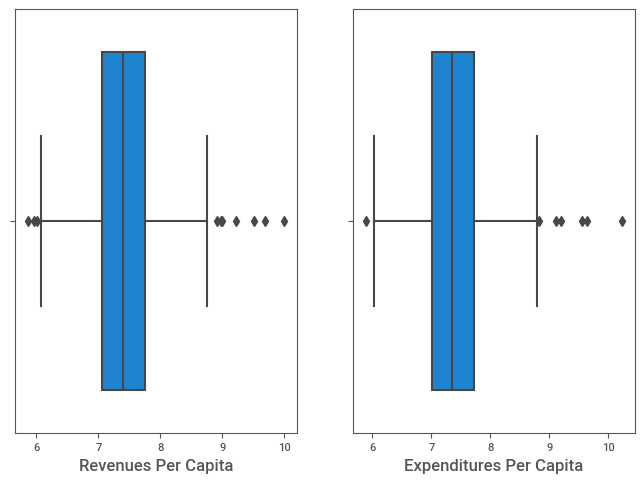

In [925]:
#determine the upper boundary and lower boundary by plotting box plot
# remove outliers from Seaborn boxplots.

import seaborn as sns 
plt.subplot(1,2,1)
sns.boxplot(x=df_provider_city_last['Revenues Per Capita'])
plt.subplot(1,2,2)
sns.boxplot(x=df_provider_city_last['Expenditures Per Capita'])

<AxesSubplot: xlabel='Expenditures Per Capita'>

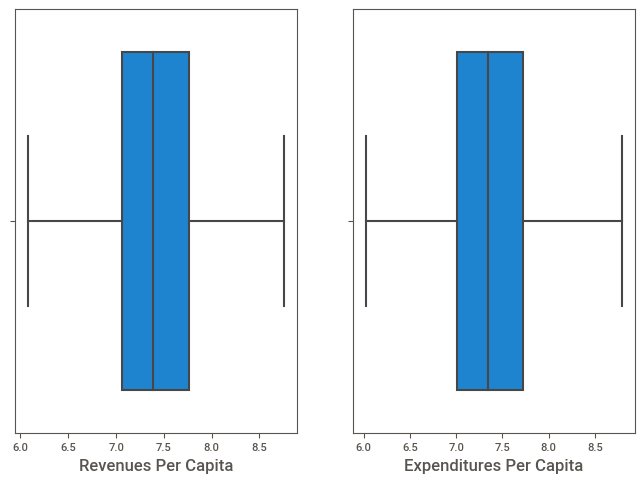

In [926]:
# Boxplot without outliers
plt.subplot(1,2,1)
sns.boxplot(x=df_provider_city_last['Revenues Per Capita'], showfliers = False)
plt.subplot(1,2,2)
sns.boxplot(x=df_provider_city_last['Expenditures Per Capita'], showfliers = False)

In [927]:
# remove outliers
Q1 = df_provider_city_last['Revenues Per Capita'].quantile(0.25)
Q3 = df_provider_city_last['Revenues Per Capita'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df_provider_city_last['Revenues Per Capita'] >= Q1 - 1.5 * IQR) & (df_provider_city_last['Revenues Per Capita'] <= Q3 + 1.5 *IQR)

df_provider_city_last = df_provider_city_last.loc[filter]  

Q1 = df_provider_city_last['Expenditures Per Capita'].quantile(0.25)
Q3 = df_provider_city_last['Expenditures Per Capita'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df_provider_city_last['Expenditures Per Capita'] >= Q1 - 1.5 * IQR) & (df_provider_city_last['Expenditures Per Capita'] <= Q3 + 1.5 *IQR)
df_provider_city_last = df_provider_city_last.loc[filter] 

df_provider_city_last.shape

(391, 9)

### Plot the preliminary histograms

(array([1., 0., 0., ..., 0., 0., 1.]),
 array([6.07534603, 6.07587133, 6.07639663, ..., 8.70079476, 8.70132006,
        8.70184536]),
 <BarContainer object of 5000 artists>)

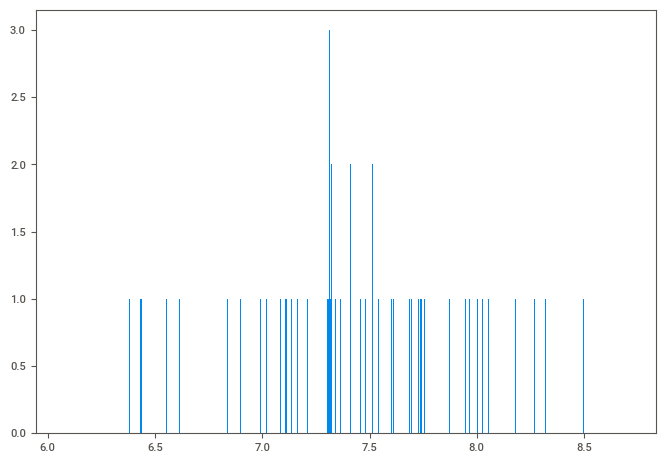

In [928]:
## plot the histogram for revenue per capita
plt.hist(df_provider_city_last['Revenues Per Capita'], bins=5000)

(array([1., 0., 0., ..., 0., 0., 1.]),
 array([6.10924758, 6.10974972, 6.11025186, ..., 8.618926  , 8.61942813,
        8.61993027]),
 <BarContainer object of 5000 artists>)

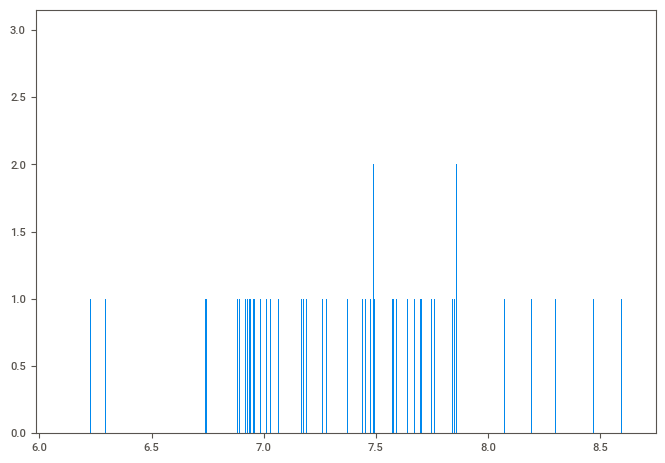

In [929]:
## plot the histogram for expenditure per capita
plt.hist(df_provider_city_last['Expenditures Per Capita'], bins=5000)

(array([2., 3., 2., ..., 0., 0., 1.]),
 array([1.41826458e-01, 1.82724018e-01, 2.23621579e-01, ...,
        2.04547835e+02, 2.04588732e+02, 2.04629630e+02]),
 <BarContainer object of 5000 artists>)

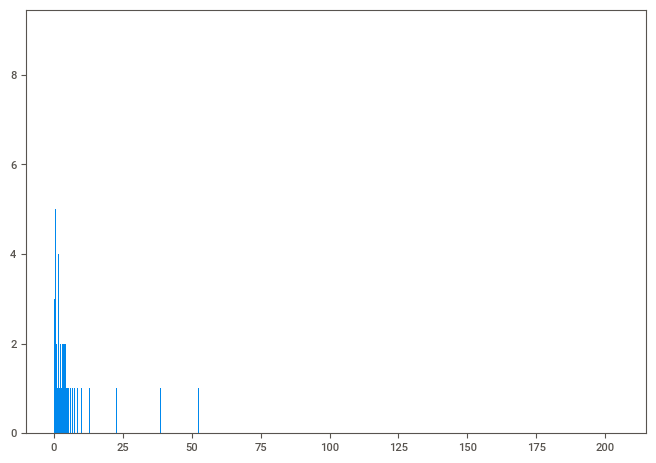

In [930]:
## plot the histogram for EHR per Capita
plt.hist(df_provider_city_last['EHR Per Capita'], bins=5000)

In [931]:
import sweetviz as sv

my_report = sv.analyze(df_provider_city_last)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |      | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Regression Analysis

LinearRegression()

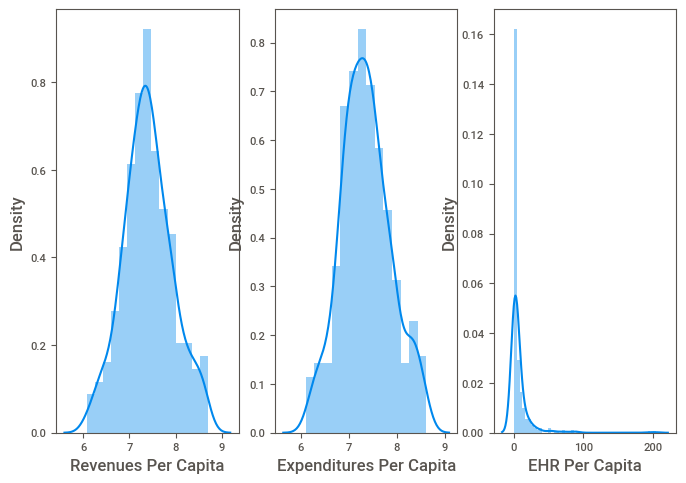

In [936]:
# Plot the Distribution plots for the features
import warnings
warnings.filterwarnings('ignore')
plt.subplot(1,3,1)
sns.distplot(df_provider_city_last['Revenues Per Capita'])
plt.subplot(1,3,2)
sns.distplot(df_provider_city_last['Expenditures Per Capita'])
plt.subplot(1,3,3)
sns.distplot(df_provider_city_last['EHR Per Capita']) # right skewed distribution
# ================================================
# Build the model
# ================================================

# Training data
X = df_provider_city_last[['Revenues Per Capita', 'Expenditures Per Capita']] # feature 
y = df_provider_city_last['EHR Per Capita'] # target

from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

# Train the model: include an intercept to the model by default
model = LinearRegression()
model.fit(X_train, y_train)

In [937]:
y_pred = model.predict(X_test)

# Comparing the test values and the predicted values
comparison_df = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
comparison_df.head()

,Actual,Predicted
130,2.382454,8.254729
146,0.857166,4.883690
287,1.675843,9.359458
263,0.370943,6.366740
338,10.011331,9.224168


In [938]:
import hvplot.pandas
pd.DataFrame({'True Values(y test)': y_test, 'Predicted Values': y_pred}).hvplot.scatter(x='True Values(y test)', y='Predicted Values')

:Scatter   [True Values(y test)]   (Predicted Values)

### Check the distribution of the error terms

In [939]:
pd.DataFrame({'Error Values': (y_test - y_pred)}).hvplot.kde()

:Distribution   [Error Values]   (Density)

Check the distribution of the error terms
In linear regression we assume that the error term follows normal distribution. So we have to check this assumption before we can use the model for making predictions. We check this by looking at the histogram of the error term visually, making sure that the error terms are normally distributed around zero and that the left and right side are broadly similar.

# Comparing machine learning models

## Random Sample Consensus(RANSAC) Regression
Random sample consensus (RANSAC) is an iterative method to estimate parameters of a mathematical model from a set of observed data that contains outliers, when outliers are to be accorded no influence on the values of the estimates. Therefore, it also can be interpreted as an outlier detection method.

A basic assumption is that the data consists of "inliers", i.e., data whose distribution can be explained by some set of model parameters, though may be subject to noise, and "outliers" which are data that do not fit the model. The outliers can come, for example, from extreme values of the noise or from erroneous measurements or incorrect hypotheses about the interpretation of data. RANSAC also assumes that, given a (usually small) set of inliers, there exists a procedure which can estimate the parameters of a model that optimally explains or fits this data.

## Stochastic Gradient Descent
Gradient Descent is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Sescent is to tweak parameters iteratively in order to minimize a cost function. Gradient Descent measures the local gradient of the error function with regards to the parameters vector, and it goes in the direction of descending gradient. Once the gradient is zero, you have reached a minimum.

In [940]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [941]:
decision_tree = DecisionTreeRegressor()
random_forest = RandomForestRegressor()
svr = SVR(kernel='rbf')
ransacr = RANSACRegressor(base_estimator=LinearRegression(), max_trials=100)
sgd = SGDRegressor(n_iter_no_change=250, penalty=None, eta0=0.0001, max_iter=100000)
adaboost = AdaBoostRegressor()
linear = LinearRegression()

decision_tree.fit(X_train,y_train)
random_forest.fit(X_train,y_train)
svr.fit(X_train,y_train)
ransacr.fit(X_train,y_train)
sgd.fit(X_train,y_train)
adaboost.fit(X_train,y_train)
linear.fit(X_train,y_train);

decision_tree_preds = decision_tree.predict(X_test)
random_forest_preds = random_forest.predict(X_test)
svr_preds = svr.predict(X_test)
ransacr_preds = ransacr.predict(X_test)
sgd_preds = sgd.predict(X_test)
adaboost_preds = adaboost.predict(X_test)
linear_preds = linear.predict(X_test)

results_df = pd.DataFrame([])

for label, preds in [('Decision Tree', decision_tree_preds),
                     ('Random Forest', random_forest_preds),
                     ('Support Vector Regression',svr_preds),
                     ('Random Sample Consensus',ransacr_preds),
                     ('Stochastic Gradient Descent',sgd_preds),
                     ('Adaboost',      adaboost_preds),
                     ('Linear',        linear_preds)]:
    
    r2 = r2_score(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, preds))
    
    results_df_2 = pd.DataFrame(data=[[label, r2, mse, mae, rmse]],
                          columns=['Model', 'R2 Square', 'MSE', 'MAE', 'RMSE'])
    results_df = results_df.append(results_df_2, ignore_index=True)

    print('\n  --- {} ---'.format(label))
    print('           R2 Score: {:.3}'.format(r2))
    print(' Mean Squared Error: {:.3}'.format(mse))
    print('Mean Absolute Error: {:.3}'.format(mae))
    print('Root Mean Square Error: {:.3}'.format(rmse))
    


  --- Decision Tree ---
           R2 Score: -6.26
 Mean Squared Error: 1.62e+03
Mean Absolute Error: 15.4
Root Mean Square Error: 40.2

  --- Random Forest ---
           R2 Score: -1.93
 Mean Squared Error: 6.52e+02
Mean Absolute Error: 11.7
Root Mean Square Error: 25.5

  --- Support Vector Regression ---
           R2 Score: -0.107
 Mean Squared Error: 2.46e+02
Mean Absolute Error: 6.26
Root Mean Square Error: 15.7

  --- Random Sample Consensus ---
           R2 Score: -0.167
 Mean Squared Error: 2.6e+02
Mean Absolute Error: 6.47
Root Mean Square Error: 16.1

  --- Stochastic Gradient Descent ---
           R2 Score: 0.0102
 Mean Squared Error: 2.2e+02
Mean Absolute Error: 8.35
Root Mean Square Error: 14.8

  --- Adaboost ---
           R2 Score: -5.37
 Mean Squared Error: 1.42e+03
Mean Absolute Error: 19.5
Root Mean Square Error: 37.7

  --- Linear ---
           R2 Score: 0.0225
 Mean Squared Error: 2.18e+02
Mean Absolute Error: 8.12
Root Mean Square Error: 14.7


<AxesSubplot: title={'center': 'R2 Square'}, ylabel='Model'>

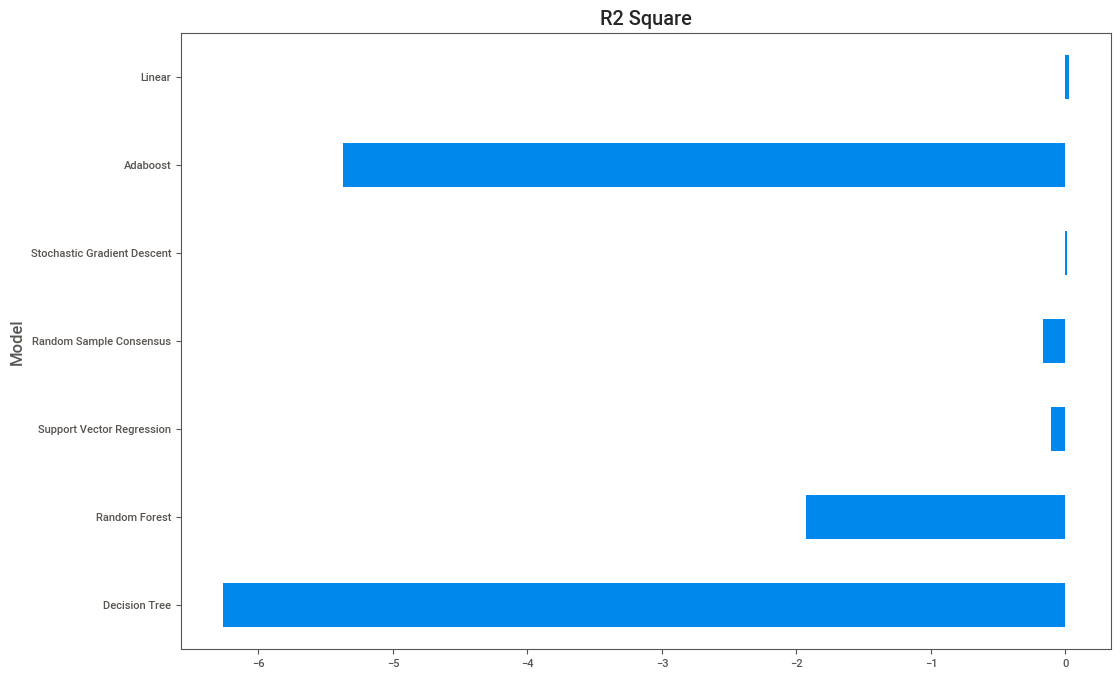

In [942]:
# plot
results_df.set_index('Model', inplace=True)
plt.title("R2 Square")
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8))

<AxesSubplot: title={'center': 'MSE'}, ylabel='Model'>

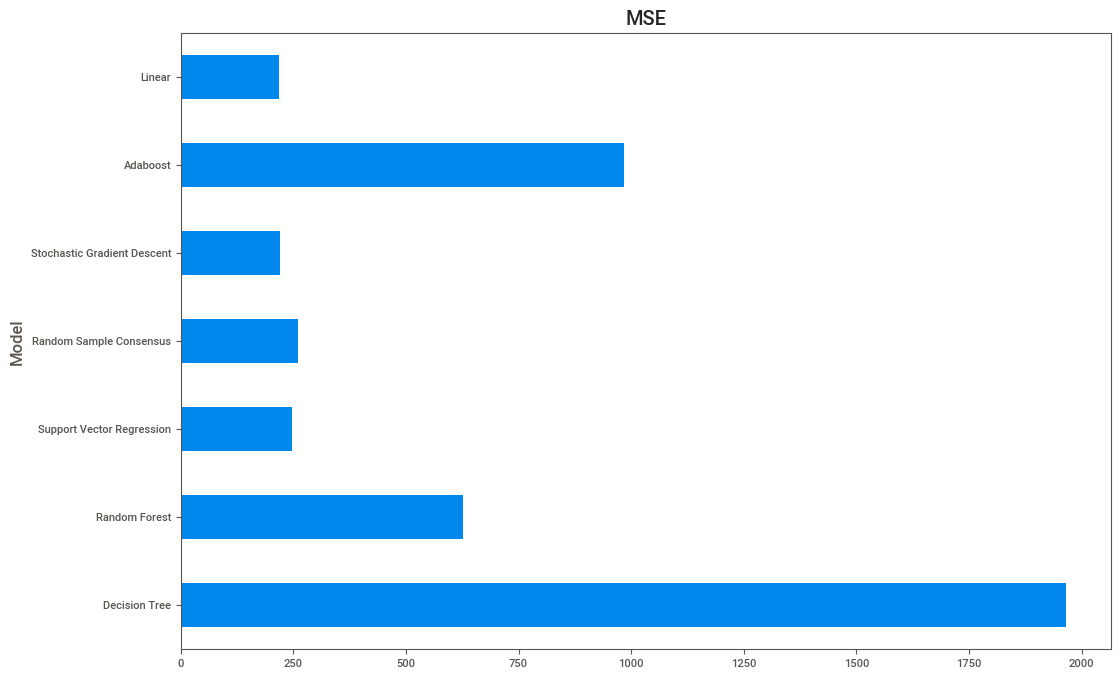

In [896]:
results_df.set_index('Model', inplace=True)
plt.title("MSE")
results_df['MSE'].plot(kind='barh', figsize=(12, 8))

<AxesSubplot: title={'center': 'MAE'}, ylabel='Model'>

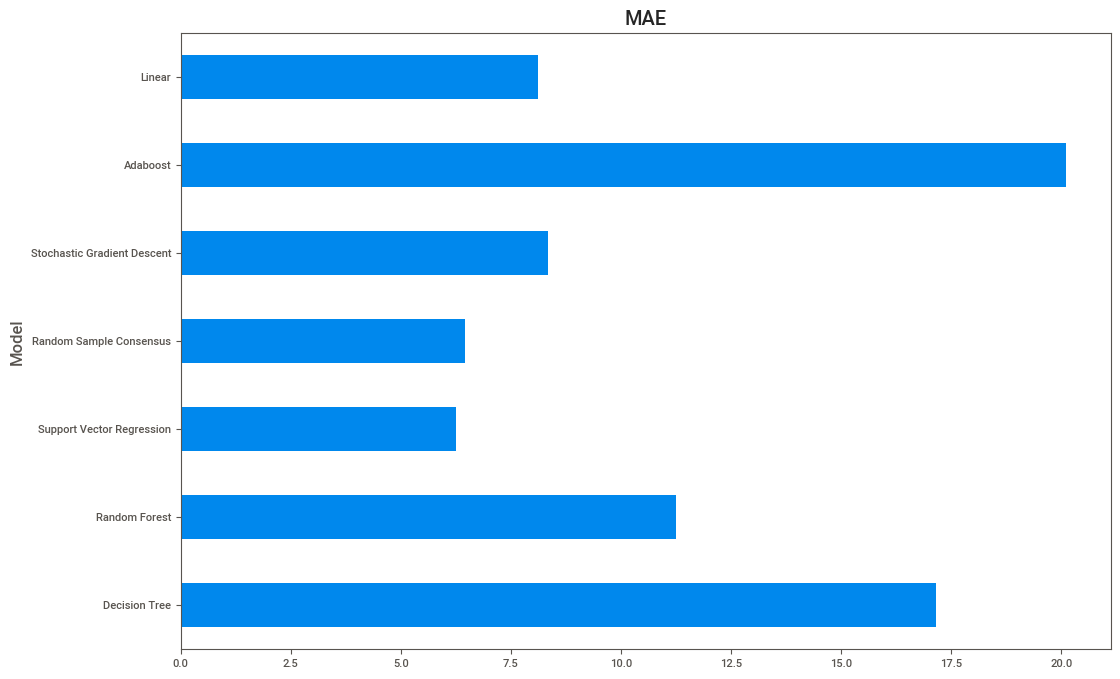

In [904]:
results_df.set_index('Model', inplace=True)
plt.title("MAE")
results_df['MAE'].plot(kind='barh', figsize=(12, 8))

<AxesSubplot: title={'center': 'RMSE'}, ylabel='Model'>

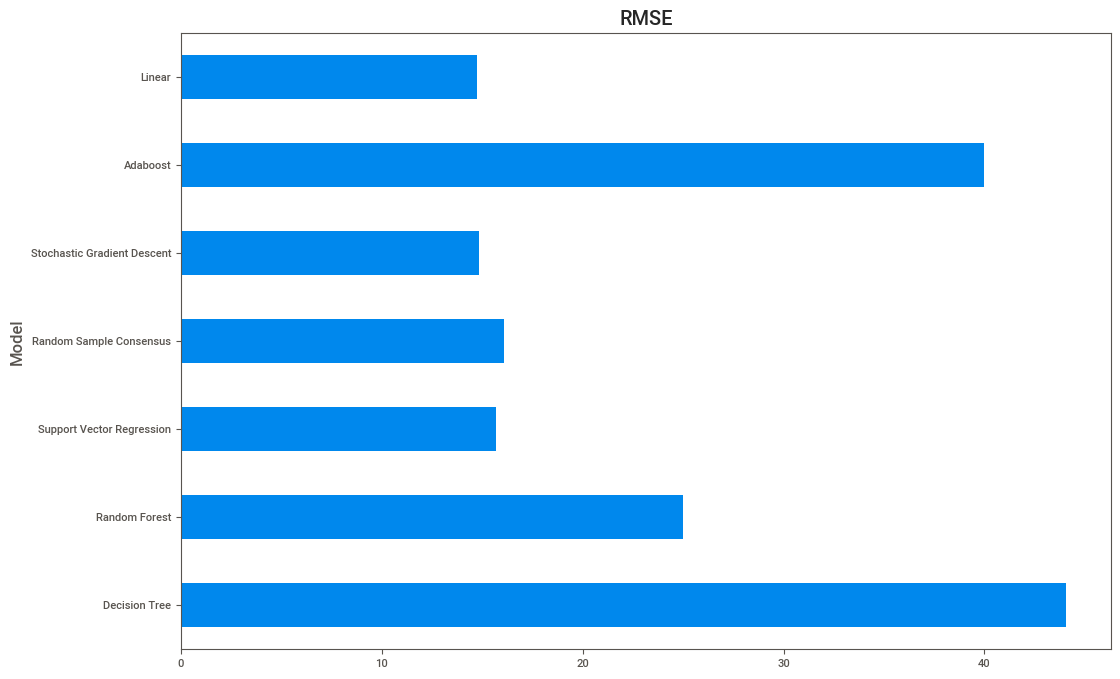

In [906]:
results_df.set_index('Model', inplace=True)
plt.title("RMSE")
results_df['RMSE'].plot(kind='barh', figsize=(12, 8))

# Kruskal-Wallis Test

Assumptions:
The variables should have:
1. One independent variable with two or more levels (independent groups) -> city (independent variable)
2. Ordinal scale, Ratio Scale or Interval scale dependent variables. -> 'EHR Per Capita' is a ratio variable.

We want to find out how city affects actual EHR per capita.

Null Hypothesis: the EHR per capita has the same distributions in each city

In [626]:
# Importing required library
from scipy.stats import kruskal

# Perform Kruskal Wallis Test
group_data = df_provider_city_last.groupby('Business_C')['EHR Per Capita'].apply(list).to_dict()

result = stats.kruskal(*group_data.values())
result

KruskalResult(statistic=390.0, pvalue=0.490476781769723)

In [628]:
#Interpretation of the results at 5% level of significance
# Level of significance
alpha = 0.05
if result.pvalue < alpha:
    print('Reject Null Hypothesis (Different distribution')
else:
    print('Do not Reject Null Hypothesis (Same distribution)')


Do not Reject Null Hypothesis (Same distribution)


# Spearman's rank correlation coefficient

H0: EHR per capita is not related to the Revenues Per Capita.

H1: EHR per capita is related to the Revenues Per Capita (Higher per-capita revenue city gets more or less per-capita EHR). 

In [707]:
from scipy import stats
result = stats.spearmanr(df_provider_city_last['EHR Per Capita'],df_provider_city_last['Revenues Per Capita'] )
print(result)
#Interpretation of the results at 5% level of significance
# Level of significance
alpha = 0.05
if result.pvalue < alpha:
    print('Reject Null Hypothesis')
else:
    print('Do not Reject Null Hypothesis')


SpearmanrResult(correlation=0.05198335907780493, pvalue=0.3052184680033309)
Do not Reject Null Hypothesis


H0: EHR per capita is not related to the Expenditures Per Capita.
    
H1: EHR per capita is related to the Expenditures Per Capita. 

In [708]:
result = stats.spearmanr(df_provider_city_last['EHR Per Capita'],df_provider_city_last['Expenditures Per Capita'] )
print(result)
#Interpretation of the results at 5% level of significance
# Level of significance
alpha = 0.05
if result.pvalue < alpha:
    print('Reject Null Hypothesis')
else:
    print('Do not Reject Null Hypothesis')

SpearmanrResult(correlation=0.03923627489966774, pvalue=0.4391312403359442)
Do not Reject Null Hypothesis


In [710]:
from scipy.stats import friedmanchisquare

# compare samples
stat, p = friedmanchisquare(df_provider_city_last['EHR Per Capita'], df_provider_city_last['Expenditures Per Capita'], df_provider_city_last['Revenues Per Capita'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=185.316, p=0.000
Different distributions (reject H0)


# Reduce variable to make the R2 square larger

LinearRegression()

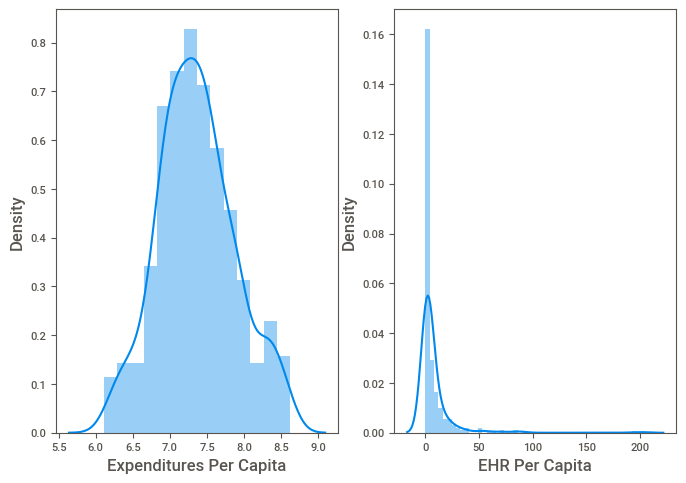

In [907]:
# Plot the Distribution plots for the features
import warnings
warnings.filterwarnings('ignore')
plt.subplot(1,2,1)
sns.distplot(df_provider_city_last['Expenditures Per Capita'])
plt.subplot(1,2,2)
sns.distplot(df_provider_city_last['EHR Per Capita']) # right skewed distribution
# ================================================
# Build the model
# ================================================

# Training data
X = df_provider_city_last[['Expenditures Per Capita']] #  feature matrix
y = df_provider_city_last['EHR Per Capita'] # target matrix

from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)


# Comparing machine learning models¶

In [697]:
# coefficient
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Revenues Per Capita,11.678199
Expenditures Per Capita,-7.991750


Interpreting the coefficients:

Holding all other features fixed, a 1 unit increase in Revenues Per Capita and Expenditures Per Capita is associated with an increase of 11.678199 and a decrease of -7.991750 in EHR per capita respectively.

In [ ]:
# surgery dataset

In [843]:
## Load the datasets
df_ehr_provider = pd.read_csv('EHR_Incentive_Program_Payments_Providers.csv')
df_ehr_hospital = pd.read_csv('EHR_Incentive_Program_Payments_Hospitals.csv')
df_city_revenue = pd.read_csv('City_Revenues_Per_Capita.csv')
df_city_expenditure = pd.read_csv('City_Expenditures_Per_Capita.csv')

## delete the unneeded columns on the provider dataset
df_ehr_provider.drop(df_ehr_provider.columns[0:8],axis=1,inplace = True)
df_ehr_provider.drop(df_ehr_provider.columns[2:5],axis=1,inplace = True)
df_ehr_provider.drop(df_ehr_provider.columns[3:7],axis=1,inplace = True)
df_ehr_provider.drop(['Latitude','Longitude','total_rece'],axis=1,inplace = True)
df_ehr_provider.head()


,Business_C,Business_1,Payment_Ye,total_paym
0,Sacramento,Sacramento,2019,38250.0
1,Oakland,Alameda,2014,21250.0
2,Antioch,Contra Costa,2016,21250.0
3,Loma Linda,San Bernardino,2015,29750.0
4,Orange,Orange,2014,21250.0


In [795]:
df_surgery = pd.read_csv('dispositionas.csv')
df_surgery.head()

,patcnty1,serv_y,disp1,Encounters
0,Alameda,2012,Acute Care,139
1,Alameda,2012,Childrens_or_Cancer,3
2,Alameda,2012,Critical Access Hospital,1
3,Alameda,2012,Died,5
4,Alameda,2012,Home Health Service,170


In [794]:
# clean the noisy data
df_ehr_hospital = df_ehr_hospital.drop(df_ehr_hospital.columns[0:7], axis=1)
df_ehr_hospital = df_ehr_hospital.drop(df_ehr_hospital.columns[[2,3,4,5,6,8,9,10,11,12]], axis=1)
#df_EHR = df_EHR.drop(['Payment__1','Payment_Cr','Payee_Name','Payee_NPI','total_rece','Latitude','Longitude','Program_Ye'],axis=1)
df_ehr_hospital = df_ehr_hospital.dropna()
df_ehr_hospital.head()



,Business_City,Business_County,total_payments,Last_Payment_Year
0,Eureka,Humboldt,1530950.70,2016
1,Hayward,Alameda,3245920.28,2016
2,Napa,Napa,1262015.89,2016
3,Jackson,Amador,865130.13,2019
4,San Francisco,San Francisco,984465.12,2019


In [796]:
len(df_ehr_hospital['Business_County'].unique())

53

In [813]:
df_ehr_provider = df_ehr_provider[df_ehr_provider['Business_1']!='UNKNOWN']
df_ehr_provider = df_ehr_provider[df_ehr_provider['Business_1']!='Unknown']
len(df_ehr_provider['Business_1'].unique())

57

In [814]:
len(df_surgery['patcnty1'].unique())

57

In [818]:
df_ehr_provider = df_ehr_provider.groupby('Business_1')['total_paym'].sum().reset_index()
df_ehr_provider.head()

,Business_1,total_paym
0,Alameda,38481077.35
1,Amador,327250.01
2,Butte,5342250.00
3,Calaveras,131750.00
4,Colusa,484500.00


In [819]:
df_surgery = df_surgery.groupby('patcnty1')['Encounters'].sum().reset_index()
df_surgery.head()

,patcnty1,Encounters
0,Alameda,620774
1,Amador,26910
2,Butte,176297
3,Calaveras,39581
4,Colusa,11924


In [820]:
result = stats.spearmanr(df_ehr_provider['total_paym'],df_surgery['Encounters'])
print(result)
#Interpretation of the results at 5% level of significance
# Level of significance
alpha = 0.05
if result.pvalue < alpha:
    print('Reject Null Hypothesis')
else:
    print('Do not Reject Null Hypothesis')

SpearmanrResult(correlation=0.9374513870884107, pvalue=7.105997639622854e-27)
Reject Null Hypothesis


In [829]:

# ================================================
# Build the model
# ================================================

# Training data
X = df_surgery[['Encounters']] # feature 
y = df_ehr_provider['total_paym'] # target

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

# Train the model: include an intercept to the model by default
model = LinearRegression()
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])

Test set evaluation:
_____________________________________
MAE: 4162910.3078936944
MSE: 27803994771543.984
RMSE: 5272949.342781892
R2 Square 0.9255851042232545
__________________________________


In [827]:
## Standard OLS
import statsmodels.api as sm
from statsmodels.formula.api import ols

y = df_ehr_provider['total_paym']
x = df_surgery['Encounters']
#z = df_provider_city_last['Expenditures Per Capita']

# adding the constant term
x = sm.add_constant(x)
lm = sm.OLS(y, x).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             total_paym   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     1185.
Date:                Sat, 19 Nov 2022   Prob (F-statistic):           6.79e-39
Time:                        01:15:29   Log-Likelihood:                -974.73
No. Observations:                  57   AIC:                             1953.
Df Residuals:                      55   BIC:                             1958.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.635e+06   9.91e+05     -2.659      0.0

In [831]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

model = DecisionTreeRegressor(random_state = 0)
model.fit(X_train, y_train)
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

results_df_2 = pd.DataFrame(data=[["Decision Tree regression", *evaluate(y_test, test_pred) , cross_val(DecisionTreeRegressor())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

ValueError: Found input variables with inconsistent numbers of samples: [18, 118]